In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
model_path = '/gdrive/My Drive/.data/'

In [3]:
import math
import matplotlib.pyplot as plt
import pickle

In [4]:
def load_pickle(path):
    with open(path, 'rb') as fr:
        result_loaded = pickle.load(fr)
    return result_loaded

In [5]:
def make_graph(result_list, test_name):
    train_result = result_list[0]
    test_result = result_list[1]
    plt.subplot(1, 2, 1)
    plt.plot(train_result['train_loss_list'])
    plt.plot(test_result['test_loss_list'])
    plt.title(str(test_name) + ' Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train loss', 'test loss'])
    if len(train_result) > 1:
        plt.subplot(1, 2, 2)
        plt.plot(train_result['train_top1_list'])
        plt.plot(test_result['test_top1_list'])
        plt.title(str(test_name) + ' Accuracy')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train accuracy', 'test accuracy'])
        plt.subplots_adjust(wspace=0.6)
        plt.show()

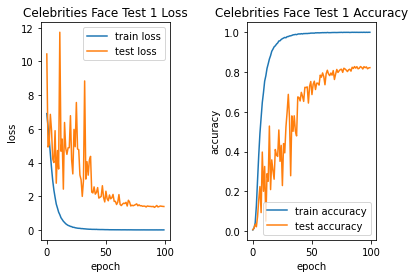

In [26]:
# Celebrities Face Test 1
## Inception v3 Model ImageNet pretrained
## Batch Size 32
## Epoch 100
## Learning Rate 0.001 (Decaying 0.94 per 2 epoches)
## train:valid = 9:1
## RMSprop
## CrossEntropyLoss
## Takes 7 hours
result_list = load_pickle(model_path + 'test1.pickle')
make_graph(result_list, 'Celebrities Face Test 1')

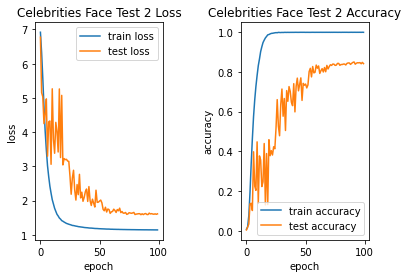

In [13]:
# Celebrities Face Test 2
## Inception v3 Model ImageNet pretrained
## Batch Size 32
## Epoch 100
## Learning Rate 0.001 (Decaying 0.94 per 2 epoches)
## train:valid = 9:1
## RMSProp
## LabelSmoothingLoss (smoothing=0.1) 
## Takes 6 hours
result_list = load_pickle(model_path + 'test2.pickle')
make_graph(result_list, 'Celebrities Face Test 2')

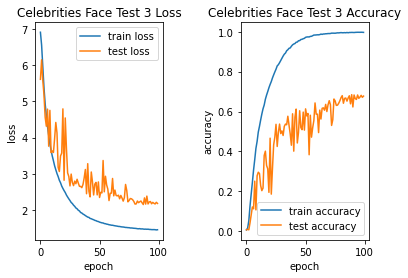

In [14]:
# Celebrities Face Test 3
## Inception v3 Model ImageNet pretrained
## Batch Size 32
## Epoch 100
## Learning Rate 0.001 (Decaying 0.94 per 2 epoches)
## train:valid = 9:1
## RMSProp (Weight Decay=0.001)
## LabelSmoothingLoss (smoothing=0.1) 
## Takes 6 hours
result_list = load_pickle(model_path + 'test4.pickle')
make_graph(result_list, 'Celebrities Face Test 3')

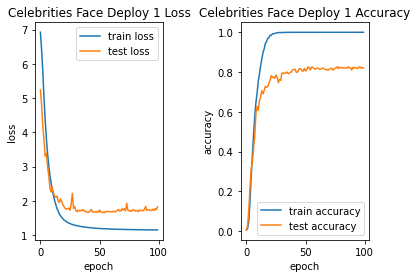

In [15]:
# Celebrities Face Deploy 1
## Inception v3 Model ImageNet pretrained
## Batch Size 32
## Epoch 100
## Learning Rate 0.001 (Decaying 0.94 per 2 epoches)
## train:test = 9:1
## RMSProp
## LabelSmoothingLoss (smoothing=0.1) 
## Takes 6 hours
result_list = load_pickle(model_path + 'celebrities_deploy1.pickle')
make_graph(result_list, 'Celebrities Face Deploy 1')

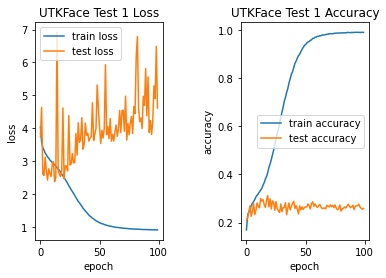

In [18]:
# UTKFace Test 1
## Inception v3 Model ImageNet pretrained
## Batch Size 32
## Epoch 100
## Learning Rate 0.001 (Decaying 0.94 per 2 epoches)
## train:valid = 9:1
## RMSProp
## Classification->LabelSmoothingLoss (smoothing=0.1) 
## Takes 10 hours
result_list = load_pickle(model_path + 'test5.pickle')
make_graph(result_list, 'UTKFace Test 1')

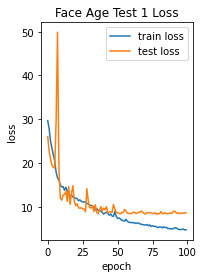

In [20]:
# Face Age Test 1
## Inception v3 Model ImageNet pretrained
## Batch Size 32
## Epoch 100
## Learning Rate 0.001 (Decaying 0.94 per 2 epoches)
## train:valid = 7:3
## Adam (betas=(0.9, 0.999))
## Regression->MSELoss
## Takes 3 hours
## Graph describes the sqrt of loss
result_list = load_pickle(model_path + 'test6.pickle')
result_list[0]['train_loss_list'] = [math.sqrt(i) for i in result_list[0]['train_loss_list']]
result_list[1]['test_loss_list'] = [math.sqrt(i) for i in result_list[1]['test_loss_list']]
make_graph(result_list, 'Face Age Test 1')

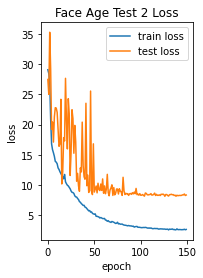

In [21]:
# Face Age Test 2
## Inception v3 Model ImageNet pretrained
## face_age
## Batch Size 32
## Epoch 150
## Learning Rate 0.001 (Decaying 0.94 per 2 epoches)
## train:valid = 7:3
## RMSProp
## Regression->MSELoss
## Takes 5 hours
## Graph describes the sqrt of loss
result_list = load_pickle(model_path + 'test7.pickle')
result_list[0]['train_loss_list'] = [math.sqrt(i) for i in result_list[0]['train_loss_list']]
result_list[1]['test_loss_list'] = [math.sqrt(i) for i in result_list[1]['test_loss_list']]
make_graph(result_list, 'Face Age Test 2')

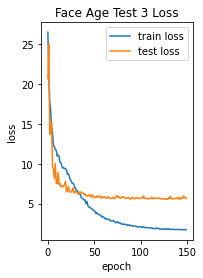

In [22]:
# Face Age Test 3
## Inception v3 Model ImageNet pretrained
## face_age
## Batch Size 32
## Epoch 150
## Learning Rate 0.01 (Decaying 0.94 per 2 epoches)
## train:valid = 5:5
## Adam (betas=(0.9, 0.999))
## Regression->L1Loss(MAELoss)
## Takes 5 hours
result_list = load_pickle(model_path + 'test8.pickle')
make_graph(result_list, 'Face Age Test 3')

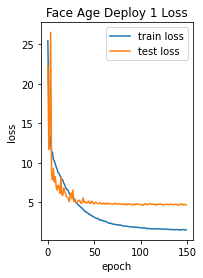

In [23]:
# Face Age Deploy 1
## Inception v3 Model ImageNet pretrained
## face_age
## Batch Size 32
## Epoch 150
## Learning Rate 0.01 (Decaying 0.94 per 2 epoches)
## train:test = 8:2
## Adam (betas=(0.9, 0.999))
## Regression->L1Loss(MAELoss)
## Takes 5 hours
result_list = load_pickle(model_path + 'face_age_deploy1.pickle')
make_graph(result_list, 'Face Age Deploy 1')

In [6]:
import torch
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn.functional as F 

In [19]:
classes = ImageFolder(model_path + 'celebrities_face').classes

CELE_DATA_MEAN = [0.5893, 0.4750, 0.4330]
CELE_DATA_STD = [0.2576, 0.2273, 0.2133]

AGE_DATA_MEAN = [0.6361, 0.4875, 0.4189]
AGE_DATA_STD = [0.2105, 0.1893, 0.1820]

input_image = Image.open(model_path + 'mine_0.jpg')

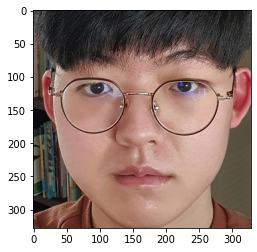

In [20]:
plt.imshow(input_image)

In [21]:
cele_preprocess = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=CELE_DATA_MEAN, std=CELE_DATA_STD),
])
age_preprocess = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=AGE_DATA_MEAN, std=AGE_DATA_STD),
])

cele_input_tensor = cele_preprocess(input_image)
cele_input_batch = cele_input_tensor.unsqueeze(0).to('cuda')
age_input_tensor = age_preprocess(input_image)
age_input_batch = age_input_tensor.unsqueeze(0).to('cuda')

cele_model = torch.load(model_path + 'celebrities_deploy1.pt').to('cuda')
age_model = torch.load(model_path + 'face_age_deploy1.pt').to('cuda')

with torch.no_grad():
    cele_output = cele_model(cele_input_batch)
    age_output = age_model(age_input_batch)

In [41]:
print('Predicted Age:', round(age_output.item()))
probs = F.softmax(cele_output[0], dim=0)
top5_prob, top5_id = torch.topk(probs, 5)
for i in range(top5_prob.size(0)):
    print('{rank:<3} {name:s} {prob:14.4f}'.format(
        rank=i+1,
        name=classes[top5_id[i]],
        prob=top5_prob[i].item()
    ))

Predicted Age: 18
1   강하늘         0.0991
2   민경훈         0.0307
3   최우식         0.0274
4   변요한         0.0239
5   이동욱         0.0237
